In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv('customers_dataset.csv')
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [14]:
df['Gender'].replace({'Male':0, 'Female':1}, inplace=True)

In [16]:
X = df.iloc[:, :].to_numpy()
X.shape

(200, 4)

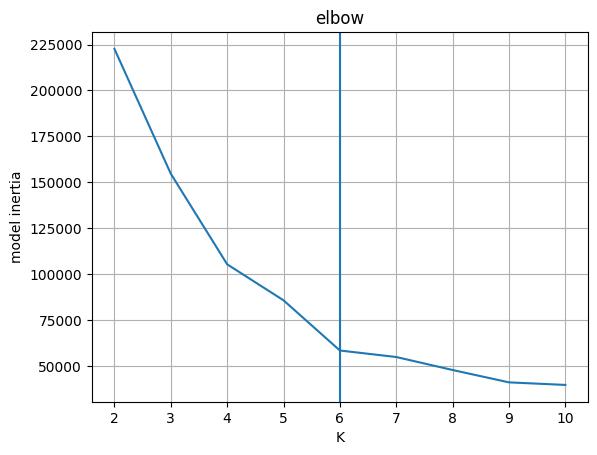

In [39]:
inertias = []
for k in range(2, 11):
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)

plt.figure()
plt.plot(np.arange(2, 11), inertias)
plt.axvline(x=6)
plt.xlabel('K')
plt.ylabel('model inertia')
plt.title('elbow')
plt.grid()    

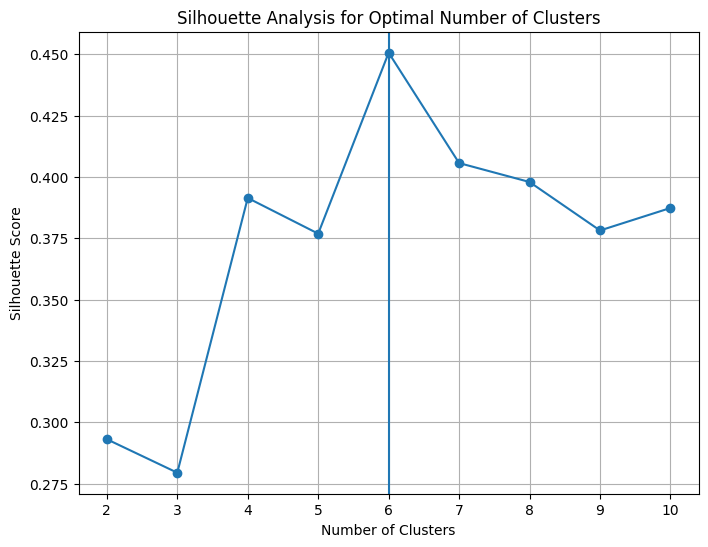

In [43]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(np.arange(2, 11), silhouette_scores, marker='o')
plt.axvline(x=6)
plt.grid()
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal Number of Clusters')
plt.show()

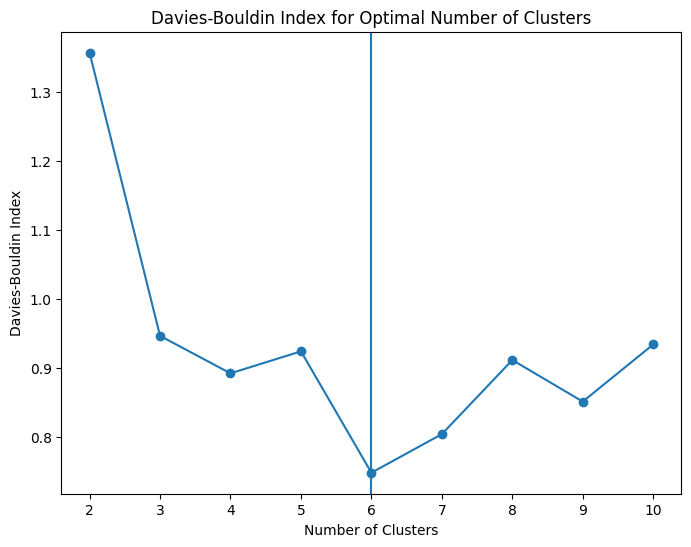

In [49]:
db_scores = []
for k in np.arange(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    db_score = davies_bouldin_score(X, labels)
    db_scores.append(db_score)

# Plot the Davies-Bouldin scores
plt.figure(figsize=(8, 6))
plt.plot(np.arange(2, 11), db_scores, marker='o')
plt.axvline(x=6)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Optimal Number of Clusters')
plt.show()

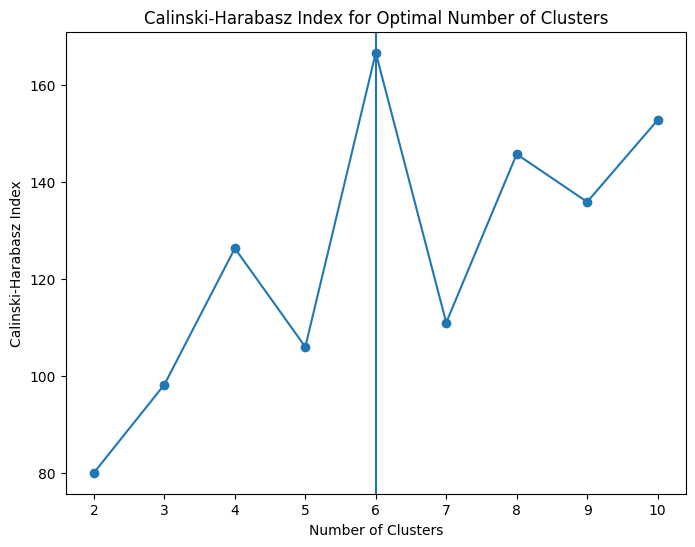

In [57]:
ch_scores = []
for k in np.arange(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    ch_score = calinski_harabasz_score(X, labels)
    ch_scores.append(ch_score)


plt.figure(figsize=(8, 6))
plt.plot(np.arange(2, 11), ch_scores, marker='o')
plt.axvline(x=6)
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for Optimal Number of Clusters')
plt.show()

In [59]:
def calculate_dunn_index(X, labels, k):
    """
    Calculate the Dunn Index for a given clustering.
    
    X: array-like, shape (n_samples, n_features)
        The input data.
    labels: array-like, shape (n_samples,)
        Cluster labels for each point.
    k: int
        Number of clusters.
    
    Returns:
    dunn_index: float
        The Dunn Index for the clustering.
    """
    # Initialize minimum inter-cluster distance to a large value
    min_intercluster_distance = np.inf
    
    # Initialize maximum intra-cluster distance to zero
    max_intracluster_distance = 0
    
    for i in range(k):
        cluster_i = X[labels == i]
        if cluster_i.shape[0] > 1:  # There should be at least two points to calculate intra-cluster distance
            intra_distances = cdist(cluster_i, cluster_i, 'euclidean')
            max_intracluster_distance = max(max_intracluster_distance, np.max(intra_distances))
        
        for j in range(i + 1, k):
            cluster_j = X[labels == j]
            inter_distances = cdist(cluster_i, cluster_j, 'euclidean')
            min_intercluster_distance = min(min_intercluster_distance, np.min(inter_distances))
    
    dunn_index = min_intercluster_distance / max_intracluster_distance
    return dunn_index

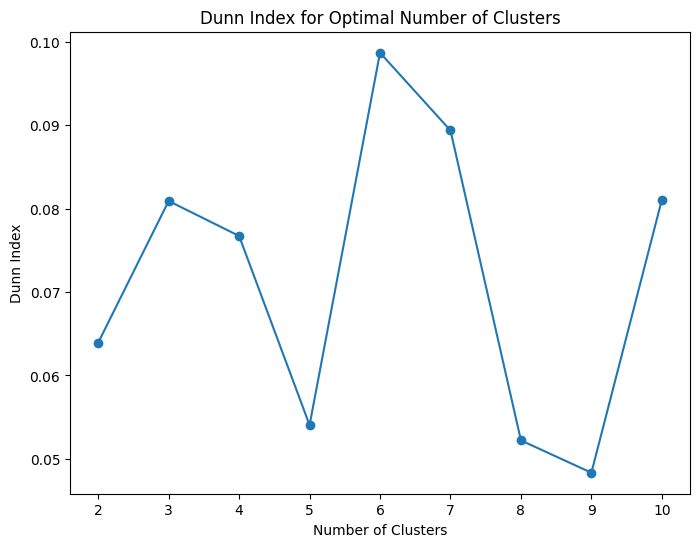

Optimal number of clusters based on Dunn Index: 6


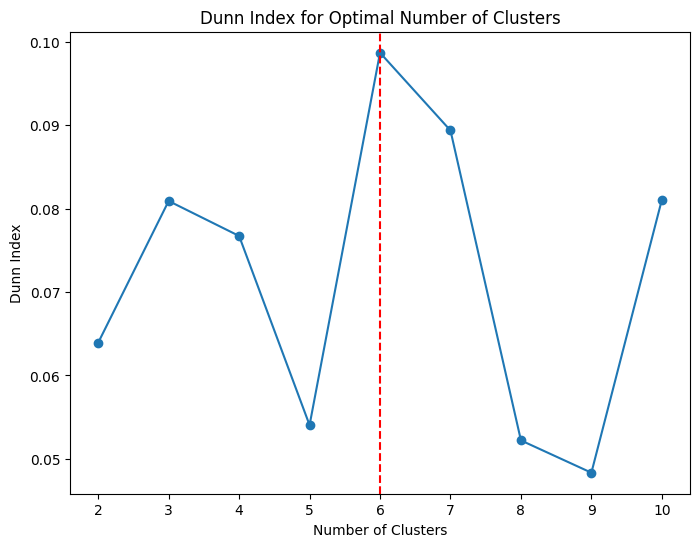

In [74]:
dunn_scores = []
for k in np.arange(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    dunn_score = calculate_dunn_index(X, labels, k)
    dunn_scores.append(dunn_score)

# Plot the Dunn Index scores
plt.figure(figsize=(8, 6))
plt.plot(np.arange(2, 11), dunn_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Dunn Index')
plt.title('Dunn Index for Optimal Number of Clusters')
plt.show()

# Identify the optimal number of clusters
optimal_clusters = np.arange(2, 11)[np.argmax(dunn_scores)]
print("Optimal number of clusters based on Dunn Index:", optimal_clusters)

# Plot the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(np.arange(2, 11), dunn_scores, marker='o')
plt.axvline(x=optimal_clusters, color='r', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Dunn Index')
plt.title('Dunn Index for Optimal Number of Clusters')
plt.show()

In [75]:
optimal_model = KMeans(n_clusters=6)
optimal_model.fit(X)

KMeans(n_clusters=6)

In [83]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [84]:
classes = {}
labels = optimal_model.predict(X)
for i in range(6):
    classes[i] = X_pca[labels == i]

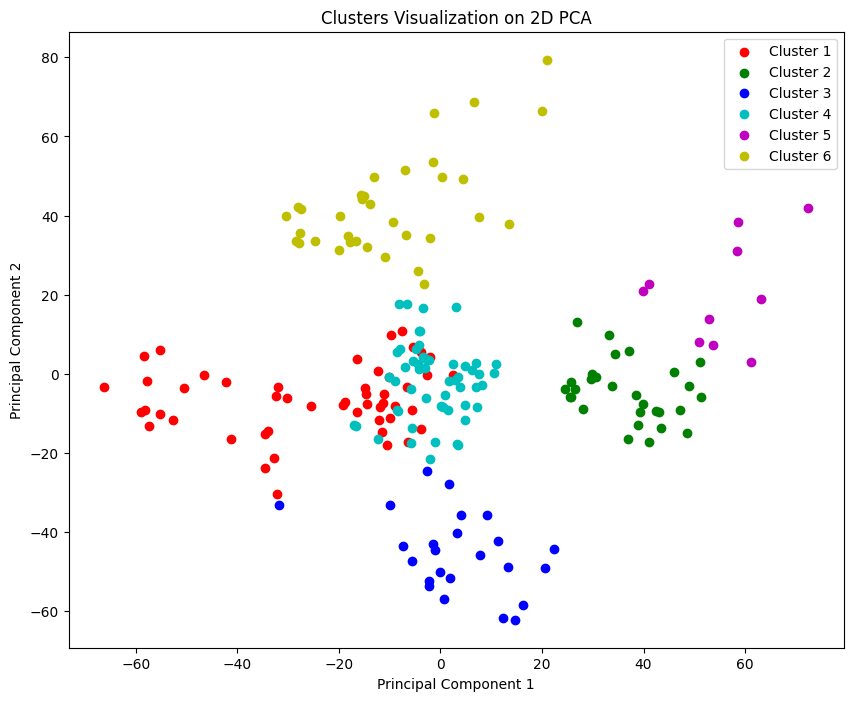

In [86]:
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# Plot each cluster with different colors
plt.figure(figsize=(10, 8))
for i in range(6):
    cluster_points = classes[i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualization on 2D PCA')
plt.legend()
plt.show()

In [88]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [89]:
classes = {}
labels = optimal_model.predict(X)
for i in range(6):
    classes[i] = X_tsne[labels == i]

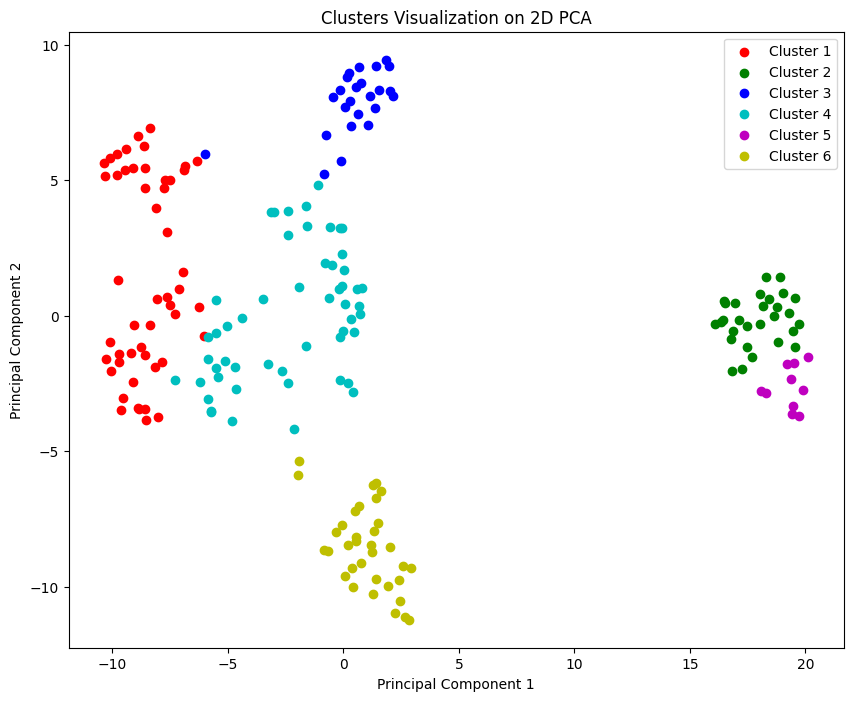

In [90]:
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# Plot each cluster with different colors
plt.figure(figsize=(10, 8))
for i in range(6):
    cluster_points = classes[i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualization on 2D PCA')
plt.legend()
plt.show()